In [2]:
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
# Breast Cancer Wisconsin (Diagnostic) Data Set was downloaded from 
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/data.csv

cancer_data = pd.read_csv("cancer_data.csv",header=0)

In [5]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# now we can drop this column Unnamed: 32 witn NaN values

cancer_data.drop("Unnamed: 32",axis=1,inplace=True)

In [7]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# assign the 30 features to a NumPy array X. 
# Using Sklearn's LabelEncoder to transform the class labels from their original string representation (M and B) into integers.
from sklearn.preprocessing import LabelEncoder
X = cancer_data.iloc[:, 2:]
Y = cancer_data.iloc[:, 1]
label_en = LabelEncoder()
y = label_en.fit_transform(Y)
# After encoding the class labels (diagnosis) in an array y, the malignant tumors are now represented as class 1, 
# and the benign tumors are represented as class 0, respectively

In [9]:
X.shape, y.shape

((569, 30), (569,))

In [111]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [10]:
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1,

In [12]:
# There are a handful of pitfalls of k-means clustering that you should address.
# Bigger values carry more weight.
# This is a problem since not all of your data will be on the same scale.  If you’re looking at a data set of real estate listings, 
# the last purchase price and the number of bathrooms will be dramatically different.  
# The distance between purchase prices will carry more weight.
# The solution is to do some sort of normalization – minmax-normalization or z-score normalization are some fairly common options.
# StandardScaler is used to Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit(X).transform(X)

In [13]:
type(X_norm)

numpy.ndarray

In [14]:
X_norm.shape

(569, 30)

In [66]:
print(X_norm)

[[ 1.09706398 -2.07333501  1.26993369 ...,  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...,  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...,  1.95500035  1.152255
   0.20139121]
 ..., 
 [ 0.70228425  2.0455738   0.67267578 ...,  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...,  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ..., -1.74506282 -0.04813821
  -0.75120669]]


In [15]:
# %load clustering.py
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time

OUTFILE = 'clustering_result.txt'
clusters = [2,10,20,30,40,50,60,70,80]
k_means = KMeans(random_state=0)


def clustering(data, labels):
    
    print('K\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    estimator = k_means
    for k in clusters:
        k_means.set_params(n_clusters=k)
        t0 = time()
        estimator.fit(data)
        print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (k, (time() - t0), estimator.inertia_,
                 metrics.homogeneity_score(labels, estimator.labels_),
                 metrics.completeness_score(labels, estimator.labels_),
                 metrics.v_measure_score(labels, estimator.labels_),
                 metrics.adjusted_rand_score(labels, estimator.labels_),
                 metrics.adjusted_mutual_info_score(labels, estimator.labels_),
                 metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean')))

In [16]:
# Cancer_data Trial with k=2,4,6,8,10,14,16,18 
clustering(data=X_norm, labels=y)

K		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
2        	0.03s	11595	0.525	0.540	0.532	0.654	0.524	0.343
10       	0.06s	6616	0.728	0.240	0.361	0.207	0.237	0.142
20       	0.08s	5212	0.761	0.185	0.297	0.105	0.179	0.107
30       	0.11s	4461	0.819	0.177	0.291	0.080	0.169	0.107
40       	0.11s	3942	0.802	0.157	0.263	0.054	0.147	0.094
50       	0.13s	3515	0.827	0.155	0.260	0.050	0.143	0.101
60       	0.14s	3261	0.828	0.145	0.246	0.037	0.131	0.086
70       	0.18s	2962	0.851	0.147	0.250	0.040	0.130	0.088
80       	0.19s	2730	0.851	0.140	0.240	0.032	0.122	0.092


In [17]:
# Cancer_data Trial with k=2,10,20,30,40,50,60,70,80
clustering(data=X_norm, labels=y)

K		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
2        	0.02s	11595	0.525	0.540	0.532	0.654	0.524	0.343
10       	0.05s	6616	0.728	0.240	0.361	0.207	0.237	0.142
20       	0.07s	5212	0.761	0.185	0.297	0.105	0.179	0.107
30       	0.10s	4461	0.819	0.177	0.291	0.080	0.169	0.107
40       	0.11s	3942	0.802	0.157	0.263	0.054	0.147	0.094
50       	0.15s	3515	0.827	0.155	0.260	0.050	0.143	0.101
60       	0.14s	3261	0.828	0.145	0.246	0.037	0.131	0.086
70       	0.16s	2962	0.851	0.147	0.250	0.040	0.130	0.088
80       	0.19s	2730	0.851	0.140	0.240	0.032	0.122	0.092


In [18]:
# %load gmm.py
from sklearn.mixture import GaussianMixture
from time import time
from sklearn import metrics
import numpy as np


def gmm(n_range, cv_types, data, labels):

    print('cv_type\t\tN\ttime\tBIC\tlog_like\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    # lowest_bic = np.infty
    # bic_list = []
    n_components_range = n_range
    # cv_types = ['spherical', 'tied', 'diag', 'full']
    cv_types = cv_types

    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            t0 = time()
            gmm.fit(data)
            bic = gmm.bic(data)
            log_likelihood = gmm.lower_bound_
            gmm_labels = gmm.predict(data)

            # print(gmm_labels)

            # bic.append(gmm.bic(X))
            # if bic[-1] < lowest_bic:
            #     lowest_bic = bic[-1]
            #     best_gmm = gmm

            print('%s\t\t%-9s\t%.2fs\t%i\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
                  % (cv_type, n_components, (time() - t0), bic, log_likelihood,
                     metrics.homogeneity_score(labels, gmm_labels),
                     metrics.completeness_score(labels, gmm_labels),
                     metrics.v_measure_score(labels, gmm_labels),
                     metrics.adjusted_rand_score(labels, gmm_labels),
                     metrics.adjusted_mutual_info_score(labels, gmm_labels),
                     metrics.silhouette_score(data, gmm_labels,
                                              metric='euclidean')
                     ))

            # print('%s\t\t%-9s\t%.2fs\t%i\t%i'
            #       % (cv_type, n_components, (time() - t0), bic, log_likelihood))

In [19]:
n_range = range(2, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
gmm(n_range, cv_types, X_norm, y)

cv_type		N	time	BIC	log_like	homo	compl	v-meas	ARI	AMI	silhouette
spherical		2        	0.01s	40561	-35	0.437	0.430	0.433	0.551	0.429	0.310
spherical		3        	0.01s	38580	-33	0.564	0.386	0.459	0.565	0.385	0.249
spherical		4        	0.01s	37660	-32	0.616	0.353	0.449	0.508	0.352	0.245
spherical		5        	0.01s	35959	-30	0.608	0.255	0.359	0.270	0.253	0.108
spherical		6        	0.02s	35448	-30	0.574	0.223	0.321	0.236	0.221	0.117
tied		2        	0.01s	11299	-6	0.608	0.657	0.632	0.705	0.608	0.330
tied		3        	0.02s	11158	-6	0.440	0.420	0.430	0.483	0.419	0.320
tied		4        	0.02s	11103	-6	0.478	0.312	0.378	0.388	0.310	0.215
tied		5        	0.04s	10881	-6	0.627	0.373	0.468	0.481	0.371	0.203
tied		6        	0.04s	9790	-4	0.441	0.275	0.339	0.335	0.272	0.206
diag		2        	0.00s	37876	-32	0.565	0.556	0.560	0.678	0.556	0.316
diag		3        	0.01s	35697	-30	0.632	0.398	0.489	0.482	0.397	0.220
diag		4        	0.01s	34047	-28	0.584	0.290	0.387	0.344	0.288	0.110
diag		5        	0.02s	32497	-26

In [20]:
# Try varying the n_component more to see any further changes/improvment.
n_range1 = [2,10,20,30,40,50,60,70,80]
cv_types1 = ['full']

gmm(n_range1, cv_types1, X_norm, y)

cv_type		N	time	BIC	log_like	homo	compl	v-meas	ARI	AMI	silhouette
full		2        	0.01s	6094	0	0.662	0.660	0.661	0.774	0.660	0.314
full		10       	0.05s	15372	14	0.764	0.254	0.381	0.235	0.251	0.115
full		20       	0.06s	25901	32	0.738	0.179	0.289	0.101	0.174	0.086
full		30       	0.04s	40228	47	0.768	0.163	0.269	0.066	0.155	0.093
full		40       	0.06s	58983	58	0.794	0.158	0.264	0.059	0.148	0.096
full		50       	0.06s	75125	72	0.808	0.152	0.256	0.050	0.140	0.105
full		60       	0.07s	94381	82	0.824	0.148	0.250	0.041	0.133	0.089
full		70       	0.07s	118266	89	0.822	0.143	0.243	0.037	0.126	0.091
full		80       	0.08s	131102	105	0.837	0.137	0.235	0.029	0.119	0.089


In [21]:
# %load PCA.py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from time import time
from sklearn.model_selection import GridSearchCV, cross_val_score


# Utility function to report best scores
# def report(results, n_top=5):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")


def PCA_score(estimator, n_components, data):

    # use cross validation to compute PCA model performance
    pca = estimator
    n_comp = []
    pca_scores = []
    exp_var_ratio = []
    t = []

    for n in n_components:

        n_comp.append(n)
        pca.n_components = n
        scores = np.mean(cross_val_score(pca, data))
        pca_scores.append(scores)
        t0 = time()
        pca.fit(data)
        t1 = time() - t0
        t.append(t1)
        exp_var_ratio.append(pca.explained_variance_ratio_[n-1])

    print('n  score  evr  time')

    for n, s, r, t in zip(n_comp, pca_scores, exp_var_ratio, t):

        print('{}  {}  {}  {}'.format(n, s, r, t))

        # print('%.3f\t%s' % (scores, pca.explained_variance_))
        # print(pca.explained_variance_ratio_)

def plot_PCA(estimator, data, y):

    target_names = ['Benign', 'Malignant']
    X = estimator.fit(data).transform(data)

    plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    colors = ['green', 'red']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of Cancer dataset')
    plt.show()


# def find_best_model(estimator, data, param_grid, cv=10, n_jobs=-1):
#
#     from sklearn.model_selection import GridSearchCV, cross_val_score
#
#     grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, n_jobs=-1)
#     # start = time()
#
#     grid_search.fit(data)
#     #
#     # print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#     #       % (time() - start, len(grid_search.cv_results_['params'])))
#
#     # report(grid_search.cv_results_)
#
#     clf = grid_search.best_estimator_
#
#     score = np.mean(cross_val_score(clf.fit(data), data))
#
#     print(score)
#
#     return clf, score

In [22]:
pca1 = PCA(random_state=0)
PCA_score(pca1, np.arange(1, 31), X_norm)

n  score  evr  time
1  -36.622697358661775  0.4427202560752634  0.0020036697387695312
2  -32.361311713443406  0.1897118204403308  0.002005338668823242
3  -30.598179124392164  0.09393163257400915  0.002005338668823242
4  -28.844180117946404  0.06602134915458176  0.0010027885437011719
5  -26.21526609629191  0.05495768492326826  0.0010027885437011719
6  -23.803322859515816  0.04024522039865973  0.002033710479736328
7  -23.015337266284394  0.02250733712708474  0.0010046958923339844
8  -22.55546683887697  0.01588723799965122  0.001977205276489258
9  -21.979728942248013  0.013896493739616636  0.002005338668823242
10  -21.402573543402394  0.011689781891143445  0.0020051002502441406
11  -20.818574077909723  0.00979718987217394  0.002005338668823242
12  -20.495319591126222  0.008705379005697619  0.0010025501251220703
13  -19.70591770237274  0.008045249871165366  0.0020072460174560547
14  -17.29177051585509  0.005233657446871314  0.0010013580322265625
15  -16.939729424520372  0.00313783215836737

In [24]:
pca1

PCA(copy=True, iterated_power='auto', n_components=30, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca2 = PCA(svd_solver='full', random_state=0)
PCA_score(pca2, np.arange(1, 31), X_norm)

n  score  evr  time
1  -36.622697358661775  0.4427202560752631  0.0010023117065429688
2  -32.361311713443406  0.1897118204403311  0.0009961128234863281
3  -30.598179124392164  0.09393163257431382  0.001003265380859375
4  -28.844180117946404  0.06602134915470168  0.0020058155059814453
5  -26.21526609629191  0.05495768492346271  0.0010023117065429688
6  -23.803322859515816  0.04024522039883338  0.0010023117065429688
7  -23.015337266284394  0.02250733712982505  0.0010030269622802734
8  -22.55546683887697  0.015887238000213296  0.0010027885437011719
9  -21.979728942248013  0.013896493745591081  0.0010025501251220703
10  -21.402573543402394  0.011689781894131493  0.0010025501251220703
11  -20.818574077909723  0.009797189875980184  0.0010020732879638672
12  -20.495319591126222  0.008705379007378842  0.0010027885437011719
13  -19.70591770237274  0.008045249871967308  0.0010025501251220703
14  -17.29177051585509  0.005233657454926357  0.0010006427764892578
15  -16.939729424520372  0.0031378321

In [26]:
pca3 = PCA(whiten=True, random_state=0)
PCA_score(pca3, np.arange(1, 31), X_norm)

n  score  evr  time
1  -37.432022532839895  0.4427202560752634  0.0030112266540527344
2  -33.575500874208664  0.1897118204403308  0.0020051002502441406
3  -32.049613677628344  0.09393163257400915  0.0010023117065429688
4  -30.372731790368864  0.06602134915458176  0.001003265380859375
5  -27.756983766881575  0.05495768492326826  0.002004861831665039
6  -25.372837177982316  0.04024522039865973  0.002007007598876953
7  -24.600921257196983  0.02250733712708474  0.0010025501251220703
8  -24.206613639698656  0.01588723799965122  0.002003908157348633
9  -23.785709519272118  0.013896493739616636  0.002005338668823242
10  -23.498160610500914  0.011689781891143445  0.002005338668823242
11  -23.32926039623256  0.00979718987217394  0.0010027885437011719
12  -23.517849268693027  0.008705379005697619  0.0010025501251220703
13  -23.588752198594808  0.008045249871165366  0.0020051002502441406
14  -23.45508726119718  0.005233657446871314  0.002005338668823242
15  -24.235622028683704  0.0031378321583673

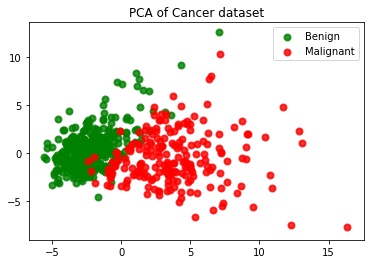

In [28]:
# plot PCA
plot_PCA(pca1, X_norm, y)

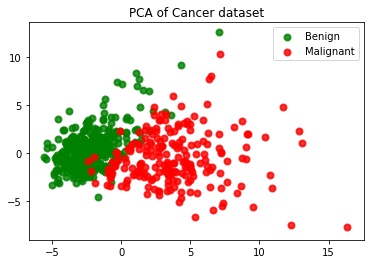

In [29]:
pca_4 = PCA(n_components=10, random_state=0)
plot_PCA(pca_4, X_norm, y)

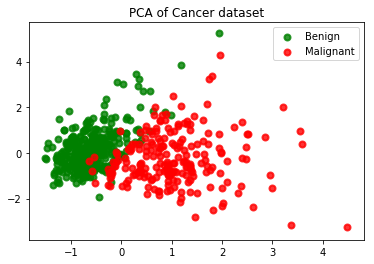

In [30]:
plot_PCA(pca3, X_norm, y)

In [31]:
from sklearn.decomposition import FastICA 
import scipy

[[-0.06582118 -0.08956838]
 [-0.06097655  0.0376955 ]
 [-0.06456987 -0.02319861]
 ..., 
 [-0.03125667  0.01868895]
 [-0.07969533 -0.09356684]
 [ 0.04423268  0.0463593 ]]
569


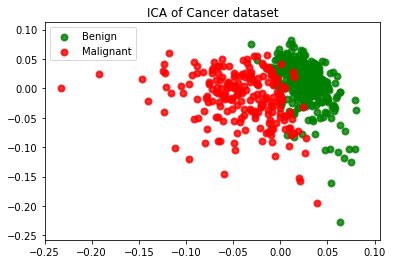

In [74]:
ica = FastICA(n_components=2, whiten=True, random_state=0)
ica_fit = ica.fit(X_norm)
ica_2d = ica.fit_transform(X_norm)

print(ica_2d)
# print(y)
print(len(ica_2d))

# print(ica_fit.components_)
# print(ica_fit.mixing_)

# kurtS = scipy.stats.kurtosis(ica_fit.components_, axis = 1)
# print(kurtS)
# kurt = scipy.stats.kurtosis(ica_2d)
# print(kurt)

# plt.scatter(ica_2d[:,0],ica_2d[:,1],  c = y, cmap = "RdYlGn",
#             edgecolor = "None", alpha=1, vmin = 75, vmax = 150)
# plt.colorbar()
# plt.title('ICA Scatter Plot')

target_names = ['Benign', 'Malignant']
    
plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = ['green', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(ica_2d[y == i, 0], ica_2d[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('ICA of Cancer dataset')
plt.show()

In [68]:
# %load ICA.py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from time import time
from sklearn.model_selection import GridSearchCV, cross_val_score
import scipy


def ICA_score(estimator, n_components, data):

    # use cross validation to compute PCA model performance
    ica = estimator
    n_comp = []
    # ica_scores = []
    kurtosis_res = []
    t = []

    for n in n_components:

        n_comp.append(n)
        ica.n_components = n
        # scores = np.mean(cross_val_score(ica, data))
        # ica_scores.append(scores)
        t0 = time()
        ica.fit(data)
        t1 = time() - t0
        t.append(t1)

        # kurt = scipy.stats.kurtosis(ica.components_, axis=1)

        kurt = scipy.stats.kurtosis(ica.fit_transform(data), axis=0)

        avg_kurt = np.mean(abs(kurt))
        kurtosis_res.append(avg_kurt)

    print('n  kurtosis  time')

    for n, k, t in zip(n_comp, kurtosis_res, t):

        print('{}  {}  {}  '.format(n, k, t))

        # print('%.3f\t%s' % (scores, pca.explained_variance_))
        # print(pca.explained_variance_ratio_)

def plot_ICA(estimator, data, y):

    target_names = ['Benign', 'Malignant']
    X = estimator.fit(data).transform(data)

    plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    colors = ['green', 'red', 'darkorange']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of Cancer dataset')
    plt.show()

In [70]:
ica_1 = FastICA(whiten=True, max_iter=20000, random_state=0)
ICA_score(ica_1, np.arange(1, 31), X_norm)

C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


n  kurtosis  time
1  0.8954442846448756  0.0020024776458740234  
2  2.6955041300504345  0.003008127212524414  
3  4.4197106925182545  0.0060155391693115234  
4  4.0098508908848  0.0030078887939453125  
5  6.411676715737203  0.00601506233215332  
6  6.0259086795065615  0.0070188045501708984  
7  8.934435325912556  0.010027408599853516  
8  9.053432177660909  0.007016420364379883  
9  10.632121243287315  0.018047571182250977  
10  12.130069622258874  0.009023904800415039  
11  17.35072440815448  0.014037132263183594  
12  20.722507124579852  0.01203155517578125  
13  20.311790642224796  0.018047809600830078  
14  19.970889305984198  0.013036012649536133  
15  19.612241956069898  0.01804828643798828  
16  20.373869668681657  0.018074750900268555  
17  23.959226220259243  0.022058725357055664  
18  27.12481563332997  0.019048690795898438  
19  25.972667951117103  0.03007984161376953  
20  27.982114252274073  0.031082630157470703  
21  28.897535310211673  0.04411888122558594  
22  29.716378

In [75]:
ica_1_res = ica_1.fit_transform(X_norm)

In [88]:
import pandas as pd
kurts = scipy.stats.kurtosis(ica_1_res, axis=0)
for k in kurts:
    print(k)
#print(kurts)
# pd.DataFrame(ica_1_res).to_csv("ICA_components_cancer_data.csv")

4.15814894824
63.6086739162
237.204670461
5.70329699185
7.4538114424
80.5991790299
10.7420080971
281.802717191
5.09431229428
11.705855957
24.3019455122
2.98678654305
54.2731898842
24.379416201
30.3140206243
2.6995642615
8.76436101501
32.8324183488
5.68014295336
4.03882107042
19.9692298922
49.3895764433
2.85375764139
7.14600680996
18.2432336131
10.8640528859
2.76670900396
14.2917126734
3.29232990259
2.34021858585


In [97]:
# %load RP.py
import scipy.sparse as sps
from scipy.linalg import pinv
import numpy as np
from collections import defaultdict
from itertools import product
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
import pandas as pd


def reconstructionError(projections,X):
    W = projections.components_
    if sps.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed = ((p@W)@(X.T)).T  # Unproject projected data
    errors = np.square(X-reconstructed)
    return np.nanmean(errors)


def pairwiseDistCorr(X1, X2):
    assert X1.shape[0] == X2.shape[0]

    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(), d2.ravel())[0, 1]


def run_RP(data):

    res1 = defaultdict(dict)
    res2 = defaultdict(dict)
    for i, com in product(range(10), range(1,31)):
        rp = SparseRandomProjection(random_state=i, n_components=com)
        rp.fit(data)
        res1[com][i] = pairwiseDistCorr(rp.fit_transform(data), data)
        res2[com][i] = reconstructionError(rp, data)
    res1 =pd.DataFrame(res1).T
    res1.to_csv('RP_PD_results.csv')

    res2 = pd.DataFrame(res2).T
    res2.to_csv('RP_RC_results.csv')


def run_RP2(data):

    res1 = defaultdict(dict)
    res2 = defaultdict(dict)
    for i, com in product(range(10), range(1,31)):
        rp = GaussianRandomProjection(random_state=i, n_components=com)
        rp.fit(data)
        res1[com][i] = pairwiseDistCorr(rp.fit_transform(data), data)
        res2[com][i] = reconstructionError(rp, data)
    res1 =pd.DataFrame(res1).T
    res1.to_csv('GRP_PD_results.csv')

    res2 = pd.DataFrame(res2).T
    res2.to_csv('GRP_RC_results.csv')

In [95]:
run_RP(X_norm)

In [98]:
# Run GaussianRandomProjection
run_RP2(X_norm)

In [109]:
grp1 = GaussianRandomProjection(n_components=2, random_state=0)
X_RP = grp1.fit_transform(X_norm)
print(X_RP.shape)
print(X_RP)

(569, 2)
[[  7.5465619   -7.02603181]
 [ -0.09410579  -2.96642915]
 [  4.83852553  -2.09046301]
 ..., 
 [ -1.72195741   1.26027863]
 [ 12.30217325  -4.7031723 ]
 [ -9.56849927   2.70485389]]


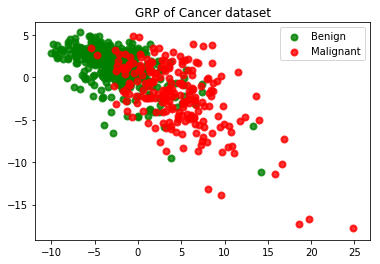

In [110]:
target_names = ['Benign', 'Malignant']
    
plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = ['green', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_RP[y == i, 0], X_RP[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('GRP of Cancer dataset')
plt.show()

In [112]:
# Features selection with random forests

In [145]:
# %load random_forests.py
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def feature_selection_rf(X, X_norm, y ):

    feat_labels = X.columns[0:]
    forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

    forest.fit(X_norm, y)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    for f in range(X_norm.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

    plt.title('Feature Importances')
    plt.bar(range(X_norm.shape[1]), importances[indices], color = 'green', align = 'center')
    plt.xticks(range(X_norm.shape[1]), feat_labels, rotation = 90)
    plt.xlim([-1, X_norm.shape[1]])
    plt.tight_layout()
    plt.show()

    X_selected = forest.transform(X_norm, threshold=0.033)
    print(X_selected.shape)

    return X_selected

 1) radius_mean                    0.131588
 2) texture_mean                   0.125050
 3) perimeter_mean                 0.117290
 4) area_mean                      0.110430
 5) smoothness_mean                0.090253
 6) compactness_mean               0.051006
 7) concavity_mean                 0.048581
 8) concave points_mean            0.047374
 9) symmetry_mean                  0.040680
10) fractal_dimension_mean         0.035289
11) radius_se                      0.032989
12) texture_se                     0.019836
13) perimeter_se                   0.015910
14) area_se                        0.014545
15) smoothness_se                  0.014360
16) compactness_se                 0.013795
17) concavity_se                   0.013271
18) concave points_se              0.012698
19) symmetry_se                    0.011262
20) fractal_dimension_se           0.006933
21) radius_worst                   0.006361
22) texture_worst                  0.005672
23) perimeter_worst             

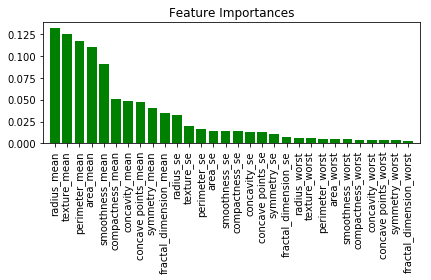

C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(569, 10)


In [146]:
X_selected = feature_selection_rf(X, X_norm, y)

In [147]:
X_selected.shape

(569, 10)

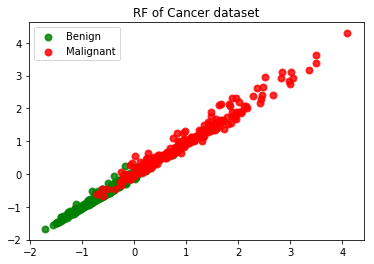

In [140]:
target_names = ['Benign', 'Malignant']
    
plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = ['green', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_selected[y == i, 0], X_selected[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('RF of Cancer dataset')
plt.show()

In [124]:
# Start part 4: based on dimentional reduction exp, choose the best performing parameters for each algorithm.

In [143]:
from sklearn.pipeline import Pipeline
# pca_4 defined previously
km = KMeans(n_clusters=2, random_state=0)
pca_km = Pipeline([('pca', pca_4), ('kmean', km)])
# ica_1 defined previously
ica_km = Pipeline([('ica', ica_1), ('kmean', km)])
grp_2 = GaussianRandomProjection(n_components=30, random_state=0)
grp_km = Pipeline([('grp', grp_2), ('kmean', km)])

gmm_1 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
pca_gmm = Pipeline([('pca', pca_4), ('kmean', km)])
ica_gmm = Pipeline([('ica', ica_1), ('kmean', km)])
grp_gmm = Pipeline([('grp', grp_2), ('kmean', km)])

In [144]:
pca_km

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmean', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))])

In [148]:
# Run dimentionality reduction to get the transformed data set.
X_pca = pca_4.fit_transform(X_norm)
X_ICA = ica_1.fit_transform(X_norm)
X_RP = grp_2.fit_transform(X_norm)
X_RF = X_selected

In [149]:
X_pca

array([[  9.19283683,   1.94858307,  -1.12316617, ...,  -0.39840081,
         -0.15711099,  -0.87740813],
       [  2.3878018 ,  -3.76817174,  -0.52929268, ...,   0.24097842,
         -0.71191157,   1.10700637],
       [  5.73389628,  -1.0751738 ,  -0.55174759, ...,   0.09737544,
          0.02406705,   0.45427438],
       ..., 
       [  1.25617928,  -1.90229671,   0.56273053, ...,   0.3418827 ,
          0.39391414,   0.52088263],
       [ 10.37479406,   1.67201011,  -1.87702934, ...,  -0.2802278 ,
         -0.5420256 ,  -0.08930712],
       [ -5.4752433 ,  -0.67063679,   1.49044308, ...,   1.04635932,
          0.37410862,  -0.04773009]])

In [150]:
# Clustering exp with PCA + Kmeans
clustering(data=X_pca, labels=y)

K		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
2        	0.07s	10770	0.525	0.540	0.532	0.654	0.524	0.356
10       	0.07s	5854	0.712	0.225	0.342	0.182	0.222	0.135
20       	0.07s	4501	0.809	0.195	0.314	0.108	0.189	0.121
30       	0.08s	3790	0.816	0.175	0.288	0.080	0.168	0.120
40       	0.10s	3335	0.867	0.168	0.281	0.057	0.158	0.106
50       	0.12s	2959	0.844	0.155	0.261	0.045	0.143	0.115
60       	0.14s	2703	0.837	0.149	0.252	0.042	0.134	0.111
70       	0.15s	2441	0.847	0.143	0.245	0.032	0.127	0.112
80       	0.15s	2237	0.840	0.138	0.238	0.030	0.120	0.114


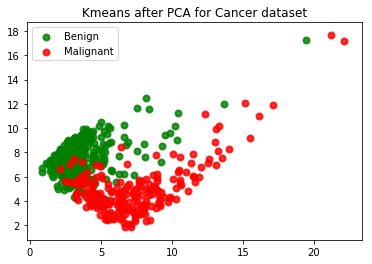

In [153]:
X_pca_km =  km.fit_transform(X_pca)

target_names = ['Benign', 'Malignant']
    
plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = ['green', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca_km[y == i, 0], X_pca_km[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Kmeans after PCA for Cancer dataset')
plt.show()

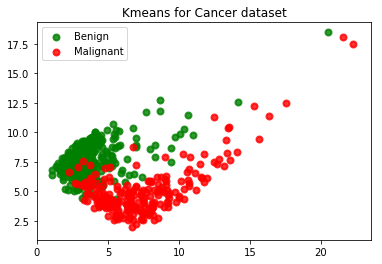

In [154]:
X_km =  km.fit_transform(X_norm)

target_names = ['Benign', 'Malignant']
    
plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = ['green', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_km[y == i, 0], X_km[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Kmeans for Cancer dataset')
plt.show()

In [156]:
# Clustering exp with ICA + Kmeans
clustering(data=X_ICA, labels=y)

K		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
2        	0.05s	29	0.201	0.276	0.232	0.276	0.200	0.173
10       	0.07s	25	0.525	0.178	0.265	0.185	0.174	-0.014
20       	0.09s	21	0.436	0.121	0.189	0.097	0.113	0.007
30       	0.12s	18	0.480	0.112	0.181	0.066	0.102	-0.010
40       	0.16s	16	0.522	0.113	0.186	0.060	0.101	0.003
50       	0.14s	15	0.550	0.111	0.184	0.049	0.096	0.002
60       	0.18s	14	0.515	0.096	0.162	0.034	0.080	0.003
70       	0.18s	13	0.539	0.098	0.166	0.031	0.079	0.019
80       	0.22s	12	0.531	0.094	0.160	0.027	0.073	0.025


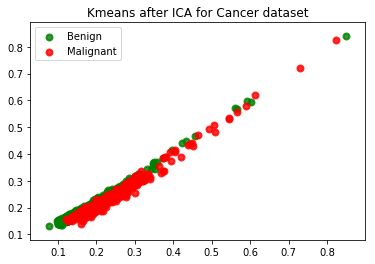

In [159]:
X_ica_km =  km.fit_transform(X_ICA)

target_names = ['Benign', 'Malignant']
    
plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = ['green', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_ica_km[y == i, 0], X_ica_km[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Kmeans after ICA for Cancer dataset')
plt.show()

In [160]:
# Clustering exp with RP + Kmeans
clustering(data=X_RP, labels=y)

K		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
2        	0.03s	12380	0.578	0.613	0.595	0.694	0.578	0.379
10       	0.09s	6613	0.736	0.236	0.358	0.189	0.233	0.140
20       	0.08s	5080	0.783	0.194	0.312	0.117	0.189	0.123
30       	0.11s	4323	0.794	0.171	0.282	0.074	0.163	0.105
40       	0.12s	3781	0.818	0.158	0.266	0.053	0.149	0.103
50       	0.14s	3330	0.785	0.147	0.247	0.046	0.135	0.114
60       	0.17s	3025	0.802	0.140	0.239	0.038	0.126	0.111
70       	0.18s	2784	0.866	0.144	0.247	0.031	0.129	0.099
80       	0.21s	2582	0.817	0.136	0.233	0.032	0.117	0.111


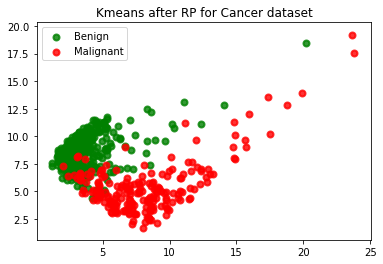

In [161]:
X_rp_km =  km.fit_transform(X_RP)

target_names = ['Benign', 'Malignant']
    
plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = ['green', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_rp_km[y == i, 0], X_rp_km[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Kmeans after RP for Cancer dataset')
plt.show()

In [162]:
# Clustering exp with RF + Kmeans
clustering(data=X_RF, labels=y)

K		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
2        	0.02s	2252	0.597	0.653	0.624	0.687	0.597	0.563
10       	0.06s	658	0.722	0.228	0.346	0.189	0.225	0.283
20       	0.07s	418	0.761	0.184	0.296	0.106	0.178	0.240
30       	0.08s	320	0.766	0.166	0.272	0.079	0.158	0.226
40       	0.11s	266	0.798	0.154	0.258	0.055	0.145	0.209
50       	0.13s	224	0.813	0.148	0.251	0.045	0.137	0.204
60       	0.14s	192	0.828	0.144	0.246	0.038	0.131	0.202
70       	0.15s	171	0.819	0.139	0.238	0.037	0.123	0.207
80       	0.17s	150	0.831	0.137	0.235	0.031	0.119	0.202


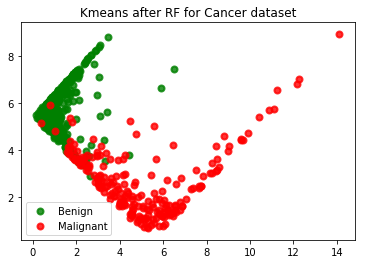

In [163]:
X_rf_km =  km.fit_transform(X_RF)

target_names = ['Benign', 'Malignant']
    
plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = ['green', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_rf_km[y == i, 0], X_rf_km[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Kmeans after RF for Cancer dataset')
plt.show()

In [164]:
# Run GMM using data transformed by PCA, ICA, RP, and RF
gmm(n_range1, cv_types1, X_pca, y)

cv_type		N	time	BIC	log_like	homo	compl	v-meas	ARI	AMI	silhouette
full		2        	0.06s	17432	-14	0.075	0.082	0.078	0.137	0.073	0.263
full		10       	0.08s	18605	-12	0.658	0.222	0.332	0.242	0.219	0.096
full		20       	0.13s	20926	-11	0.707	0.176	0.282	0.118	0.170	0.056
full		30       	0.13s	21910	-8	0.765	0.171	0.279	0.101	0.163	0.082
full		40       	0.14s	24389	-6	0.826	0.162	0.271	0.058	0.152	0.070
full		50       	0.17s	25223	-3	0.854	0.155	0.263	0.046	0.144	0.093
full		60       	0.19s	27024	-1	0.822	0.143	0.244	0.037	0.130	0.094
full		70       	0.22s	27616	1	0.832	0.141	0.241	0.035	0.125	0.102
full		80       	0.25s	29142	3	0.842	0.138	0.237	0.031	0.120	0.102


In [165]:
gmm_2 = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
X_pca_gmm =  gmm_2.fit_transform(X_pca)

target_names = ['Benign', 'Malignant']
    
plt.figure()
    # colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    #           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = ['green', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_rf_km[y == i, 0], X_rf_km[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('GMM after PCA for Cancer dataset')
plt.show()

AttributeError: 'GaussianMixture' object has no attribute 'fit_transform'

In [167]:
gmm(n_range1, cv_types1, X_ICA, y)

cv_type		N	time	BIC	log_like	homo	compl	v-meas	ARI	AMI	silhouette
full		2        	0.03s	-55480	54	0.103	0.283	0.151	0.104	0.102	0.130
full		10       	0.11s	-48065	69	0.541	0.210	0.302	0.360	0.206	0.043
full		20       	0.24s	-26307	78	0.387	0.110	0.171	0.114	0.102	-0.011
full		30       	0.13s	-7047	89	0.371	0.084	0.136	0.038	0.074	-0.004
full		40       	0.15s	14457	97	0.497	0.105	0.173	0.058	0.093	-0.006
full		50       	0.09s	40533	102	0.392	0.077	0.129	0.027	0.063	-0.002
full		60       	0.10s	67302	106	0.465	0.089	0.149	0.030	0.072	0.017
full		70       	0.12s	87733	116	0.580	0.104	0.177	0.031	0.086	0.007
full		80       	0.13s	115577	119	0.494	0.087	0.148	0.026	0.066	0.014


In [168]:
gmm(n_range1, cv_types1, X_RP, y)

cv_type		N	time	BIC	log_like	homo	compl	v-meas	ARI	AMI	silhouette
full		2        	0.02s	-9007	13	0.661	0.661	0.661	0.774	0.660	0.339
full		10       	0.06s	-810	28	0.709	0.232	0.350	0.212	0.229	0.119
full		20       	0.07s	16981	40	0.770	0.190	0.305	0.111	0.185	0.113
full		30       	0.09s	36726	50	0.815	0.180	0.295	0.087	0.172	0.114
full		40       	0.05s	50214	66	0.808	0.163	0.271	0.066	0.153	0.112
full		50       	0.07s	67044	79	0.776	0.145	0.244	0.046	0.133	0.106
full		60       	0.07s	82397	93	0.815	0.142	0.242	0.036	0.128	0.104
full		70       	0.09s	112859	94	0.842	0.146	0.248	0.038	0.129	0.100
full		80       	0.10s	134698	102	0.840	0.140	0.239	0.032	0.121	0.110


In [169]:
gmm(n_range1, cv_types1, X_RF, y)

cv_type		N	time	BIC	log_like	homo	compl	v-meas	ARI	AMI	silhouette
full		2        	0.01s	-5208	5	0.620	0.612	0.616	0.731	0.612	0.499
full		10       	0.08s	-5320	8	0.675	0.228	0.341	0.237	0.225	0.183
full		20       	0.18s	-3337	10	0.748	0.182	0.293	0.111	0.177	0.169
full		30       	0.19s	-1011	11	0.765	0.160	0.265	0.065	0.153	0.155
full		40       	0.20s	714	14	0.801	0.161	0.268	0.070	0.151	0.168
full		50       	0.17s	3311	15	0.811	0.152	0.256	0.053	0.140	0.178
full		60       	0.23s	5132	17	0.808	0.145	0.246	0.050	0.131	0.173
full		70       	0.17s	7249	19	0.835	0.140	0.240	0.033	0.125	0.186
full		80       	0.24s	8866	21	0.839	0.139	0.238	0.034	0.120	0.186


In [ ]:
#